# Evaluation: Pearson similarity and ITR similarity

In [26]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import csv
import matplotlib.pyplot as plt

## Load Data

In [2]:
ratings_df = pd.read_csv('../dataset/ratings.csv')

In [3]:
# user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ratings sample

In [37]:
rated_items = user_item_matrix.loc[64].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  294 Score itr similarity:  217


In [44]:
rated_items = user_item_matrix.loc[122].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)


Score person similarity:  128 Score itr similarity:  164

In [46]:
rated_items = user_item_matrix.loc[160].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  242
Score itr similarity:  193

In [50]:
rated_items = user_item_matrix.loc[200].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  196
Score itr similarity:  135

In [52]:
rated_items = user_item_matrix.loc[438].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  364
Score itr similarity:  266

In [54]:
rated_items = user_item_matrix.loc[599].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  627
Score itr similarity:  1531

In [58]:
rated_items = user_item_matrix.loc[609].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  18
Score itr similarity:  18

In [60]:
rated_items = user_item_matrix.loc[610].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  408
Score itr similarity:  732

In [62]:
rated_items = user_item_matrix.loc[80].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  69
Score itr similarity:  94

In [65]:
rated_items = user_item_matrix.loc[89].dropna()
ratings = []
for rating in rated_items:
    ratings.append(rating)

Score person similarity:  40
Score itr similarity:  278

## Prediction accuracy of Predict_rating without abs and considering all users in the prediction formula 

In [38]:
from utils.predict_ratings import predict_rating, predict_rating_with_abs
from utils.similarity_metrics import compute_user_similarity_with_ITR_all_users,compute_user_similarity_with_pearson_correlation_all_users

In [6]:
similarities_pearson_correlation = compute_user_similarity_with_pearson_correlation_all_users(user_item_matrix)
similarities_ITR_correlation = compute_user_similarity_with_ITR_all_users(user_item_matrix)

In [66]:
results = []
i = 0
score_ps = 0
score_itr = 0
for item_id in rated_items.index:
    
    true_value = ratings[i]
    i += 1
    # Prediction with Pearson similarity
    predicted_rating_pearson = predict_rating(89, item_id, user_item_matrix, similarities_pearson_correlation,0)
    # Prediction with ITR similarity
    predicted_rating_itr = predict_rating(89, item_id, user_item_matrix, similarities_ITR_correlation,0)
    
    results.append([item_id,true_value, predicted_rating_pearson, predicted_rating_itr])

    diff_pearson = abs(predicted_rating_pearson - true_value)
    diff_itr = abs(predicted_rating_itr - true_value)

    if diff_pearson < diff_itr:
        score_ps += 1
    if diff_itr < diff_pearson:
        score_itr += 1
        
print("Score person similarity: ",score_ps)
print("Score itr similarity: ",score_itr)
print(tabulate(results, headers=["Item ID", "True Value", "Pearson Similarity Prediction", "ITR Similarity Prediction"], tablefmt="grid"))


Score person similarity:  40
Score itr similarity:  278
+-----------+--------------+---------------------------------+-----------------------------+
|   Item ID |   True Value |   Pearson Similarity Prediction |   ITR Similarity Prediction |
+===========+==============+=================================+=============================+
|         1 |          3   |                       4.41499   |                     3.76638 |
+-----------+--------------+---------------------------------+-----------------------------+
|        11 |          2.5 |                       4.09004   |                     3.32349 |
+-----------+--------------+---------------------------------+-----------------------------+
|        88 |          2   |                       3.95555   |                     2.85272 |
+-----------+--------------+---------------------------------+-----------------------------+
|       104 |          4   |                       3.3269    |                     3.48    |
+-----------+-

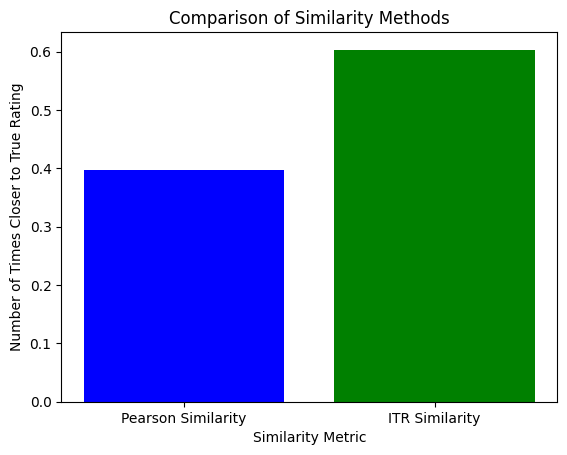

In [68]:
score_ps =  2386/6014
score_itr = 3628/6014

# Creazione del grafico a barre
labels = ['Pearson Similarity', 'ITR Similarity']
scores = [score_ps, score_itr]

plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Similarity Metric')
plt.ylabel('Number of Times Closer to True Rating')
plt.title('Comparison of Similarity Methods')
plt.show()

In [8]:
file_name = "predictions.csv"

# Open the file
with open(file_name, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    #header
    writer.writerow(["Item ID", "Pearson Similarity Prediction", "ITR Similarity Prediction"])
    
    # write results
    for row in results:
        writer.writerow(row)

print(f"Results saved '{file_name}'.")

Results saved 'predictions.csv'.


## Prediction accuracy of Predict_rating without abs and considering most similar users in the prediction formula (neighborhood)

In [9]:
results = []
i = 0
score_ps = 0
score_itr = 0
for item_id in rated_items.index:
    true_value = ratings[i]
    i += 1
    # Prediction with Pearson similarity
    predicted_rating_pearson = predict_rating(1, item_id, user_item_matrix, similarities_pearson_correlation,1)
    # Prediction with ITR similarity
    predicted_rating_itr = predict_rating(1, item_id, user_item_matrix, similarities_ITR_correlation,1)
    
    results.append([item_id,true_value, predicted_rating_pearson, predicted_rating_itr])
    
    diff_pearson = abs(predicted_rating_pearson - true_value)
    diff_itr = abs(predicted_rating_itr - true_value)

    if diff_pearson < diff_itr:
        score_ps += 1
    if diff_itr < diff_pearson:
        score_itr += 1

print("Score person similarity: ",score_ps)
print("Score itr similarity: ",score_itr)

print(tabulate(results, headers=["Item ID", "True Value", "Pearson Similarity Prediction", "ITR Similarity Prediction"], tablefmt="grid"))

Score person similarity:  162
Score itr similarity:  69
+-----------+--------------+---------------------------------+-----------------------------+
|   Item ID |   True Value |   Pearson Similarity Prediction |   ITR Similarity Prediction |
+===========+==============+=================================+=============================+
|         1 |            4 |                         4.51536 |                     4.66101 |
+-----------+--------------+---------------------------------+-----------------------------+
|         3 |            4 |                         4.03733 |                     4.08945 |
+-----------+--------------+---------------------------------+-----------------------------+
|         6 |            4 |                         4.49427 |                     4.56624 |
+-----------+--------------+---------------------------------+-----------------------------+
|        47 |            5 |                         4.99702 |                     4.7315  |
+-----------+-

In [10]:
file_name = "predictions_most_similar.csv"

# Open the file
with open(file_name, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    #header
    writer.writerow(["Item ID", "Pearson Similarity Prediction", "ITR Similarity Prediction"])
    
    # write results
    for row in results:
        writer.writerow(row)

print(f"Results saved '{file_name}'.")

Results saved 'predictions_most_similar.csv'.


## Prediction accuracy of Predict_rating with abs and considering all users in the prediction formula

In [11]:
results_2 = []
i = 0
score_ps = 0
score_itr = 0
for item_id in rated_items.index:
    true_value = ratings[i]
    i += 1
    # Prediction with Pearson similarity
    predicted_rating_pearson = predict_rating_with_abs(1, item_id, user_item_matrix, similarities_pearson_correlation,0)
    # Prediction with ITR similarity
    predicted_rating_itr = predict_rating_with_abs(1, item_id, user_item_matrix, similarities_ITR_correlation,0)
    
    results_2.append([item_id,true_value, predicted_rating_pearson, predicted_rating_itr])

    diff_pearson = abs(predicted_rating_pearson - true_value)
    diff_itr = abs(predicted_rating_itr - true_value)

    if diff_pearson < diff_itr:
        score_ps += 1
    if diff_itr < diff_pearson:
        score_itr += 1

print("Score person similarity: ",score_ps)
print("Score itr similarity: ",score_itr)
print(tabulate(results_2, headers=["Item ID", "True Value", "Pearson Similarity Prediction", "ITR Similarity Prediction"], tablefmt="grid"))


Score person similarity:  150
Score itr similarity:  81
+-----------+--------------+---------------------------------+-----------------------------+
|   Item ID |   True Value |   Pearson Similarity Prediction |   ITR Similarity Prediction |
+===========+==============+=================================+=============================+
|         1 |            4 |                         4.40474 |                     4.65569 |
+-----------+--------------+---------------------------------+-----------------------------+
|         3 |            4 |                         4.07405 |                     4.08764 |
+-----------+--------------+---------------------------------+-----------------------------+
|         6 |            4 |                         4.39643 |                     4.5783  |
+-----------+--------------+---------------------------------+-----------------------------+
|        47 |            5 |                         4.84033 |                     4.72959 |
+-----------+-

In [12]:
file_name = "predictions2.csv"

# Open the file
with open(file_name, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    #header
    writer.writerow(["Item ID", "Pearson Similarity Prediction", "ITR Similarity Prediction"])
    
    # write results
    for row in results_2:
        writer.writerow(row)

print(f"Results saved '{file_name}'.")


Results saved 'predictions2.csv'.


## Prediction accuracy of Predict_rating with abs and considering most similar users in the prediction formula (neighborhood)

In [13]:
results_2 = []
i = 0
score_ps = 0
score_itr = 0
for item_id in rated_items.index:
    true_value = ratings[i]
    i += 1
    # Prediction with Pearson similarity
    predicted_rating_pearson = predict_rating_with_abs(1, item_id, user_item_matrix, similarities_pearson_correlation,1)
    # Prediction with ITR similarity
    predicted_rating_itr = predict_rating_with_abs(1, item_id, user_item_matrix, similarities_ITR_correlation,1)
    
    results_2.append([item_id,true_value, predicted_rating_pearson, predicted_rating_itr])

    diff_pearson = abs(predicted_rating_pearson - true_value)
    diff_itr = abs(predicted_rating_itr - true_value)

    if diff_pearson < diff_itr:
        score_ps += 1
    if diff_itr < diff_pearson:
        score_itr += 1
        
print("Score person similarity: ",score_ps)
print("Score itr similarity: ",score_itr)
print(tabulate(results_2, headers=["Item ID", "True Value", "Pearson Similarity Prediction", "ITR Similarity Prediction"], tablefmt="grid"))


Score person similarity:  151
Score itr similarity:  80
+-----------+--------------+---------------------------------+-----------------------------+
|   Item ID |   True Value |   Pearson Similarity Prediction |   ITR Similarity Prediction |
+===========+==============+=================================+=============================+
|         1 |            4 |                         4.51632 |                     4.65569 |
+-----------+--------------+---------------------------------+-----------------------------+
|         3 |            4 |                         4.15499 |                     4.08764 |
+-----------+--------------+---------------------------------+-----------------------------+
|         6 |            4 |                         4.51547 |                     4.5783  |
+-----------+--------------+---------------------------------+-----------------------------+
|        47 |            5 |                         4.87364 |                     4.72959 |
+-----------+-

In [14]:
file_name = "predictions2_most_similar.csv"

# Open the file
with open(file_name, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    #header
    writer.writerow(["Item ID", "Pearson Similarity Prediction", "ITR Similarity Prediction"])
    
    # write results
    for row in results_2:
        writer.writerow(row)

print(f"Results saved '{file_name}'.")

Results saved 'predictions2_most_similar.csv'.
